# "Target2 Saldos by ECB"
> "Capital flows between European Central Banks since 2001"

- toc:true
- branch: master
- badges: true
- comments: true
- author: <a href=https://github.com/claudia-chehade/>Claudia Chehade</a>
- image: images/target2_small.png
- categories: [ECB, Capital Flow, Target2]

In [1]:
# hide
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import altair as alt
from vega_datasets import data

In [2]:
# hide
df_target2 = pd.read_csv('data\data.csv', skiprows=1)

In [3]:
# hide
df_target2.head()

,Unnamed: 0,TGB.M.4F.E.A094T.U2.EUR.A,TGB.M.4F.E.A094T.U2.EUR.E,TGB.M.AT.N.A094T.U2.EUR.A,TGB.M.AT.N.A094T.U2.EUR.E,TGB.M.BE.N.A094T.U2.EUR.A,TGB.M.BE.N.A094T.U2.EUR.E,TGB.M.CY.N.A094T.U2.EUR.A,TGB.M.CY.N.A094T.U2.EUR.E,TGB.M.DE.N.A094T.U2.EUR.A,...,TGB.M.NL.N.A094T.U2.EUR.A,TGB.M.NL.N.A094T.U2.EUR.E,TGB.M.PT.N.A094T.U2.EUR.A,TGB.M.PT.N.A094T.U2.EUR.E,TGB.M.SI.N.A094T.U2.EUR.A,TGB.M.SI.N.A094T.U2.EUR.E,TGB.M.SK.N.A094T.U2.EUR.A,TGB.M.SK.N.A094T.U2.EUR.E,TGB.M.U4.N.A094T.U2.EUR.A,TGB.M.U4.N.A094T.U2.EUR.E
0,NaN,"European Central Bank (ECB), ECB, Average of o...","European Central Bank (ECB), ECB, End of period","Austria, NCBs, Average of observations through...","Austria, NCBs, End of period","Belgium, NCBs, Average of observations through...","Belgium, NCBs, End of period","Cyprus, NCBs, Average of observations through ...","Cyprus, NCBs, End of period","Germany, NCBs, Average of observations through...",...,"Netherlands, NCBs, Average of observations thr...","Netherlands, NCBs, End of period","Portugal, NCBs, Average of observations throug...","Portugal, NCBs, End of period","Slovenia, NCBs, Average of observations throug...","Slovenia, NCBs, End of period","Slovakia, NCBs, Average of observations throug...","Slovakia, NCBs, End of period","Extra Euro area, NCBs, Average of observations...","Extra Euro area, NCBs, End of period"
1,Collection:,Average of observations through period (A),End of period (E),Average of observations through period (A),End of period (E),Average of observations through period (A),End of period (E),Average of observations through period (A),End of period (E),Average of observations through period (A),...,Average of observations through period (A),End of period (E),Average of observations through period (A),End of period (E),Average of observations through period (A),End of period (E),Average of observations through period (A),End of period (E),Average of observations through period (A),End of period (E)
2,Period\Unit:,[Millions of Euro],[Millions of Euro],[Millions of Euro],[Millions of Euro],[Millions of Euro],[Millions of Euro],[Millions of Euro],[Millions of Euro],[Millions of Euro],...,[Millions of Euro],[Millions of Euro],[Millions of Euro],[Millions of Euro],[Millions of Euro],[Millions of Euro],[Millions of Euro],[Millions of Euro],[Millions of Euro],[Millions of Euro]
3,2020Jun,-204589.64,-259944.34,-36802.68,-36693.71,-63908.88,-63148.02,7322.72,7283.33,949991.05,...,82832.84,69724.14,-78335.14,-82713.80,7562.89,7542.19,14986.92,13655.19,4258.57,2594.67
4,2020May,-140045.08,-145451.48,-39910.46,-36636.43,-67779.00,-79644.78,7987.73,7575.22,938518.49,...,92684.40,77858.01,-71994.86,-72034.67,6901.04,7207.95,15671.42,14566.43,4397.25,2938.25


In [4]:
# hide
df_target2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 43 columns):
Unnamed: 0                   236 non-null object
TGB.M.4F.E.A094T.U2.EUR.A    237 non-null object
TGB.M.4F.E.A094T.U2.EUR.E    149 non-null object
TGB.M.AT.N.A094T.U2.EUR.A    237 non-null object
TGB.M.AT.N.A094T.U2.EUR.E    149 non-null object
TGB.M.BE.N.A094T.U2.EUR.A    237 non-null object
TGB.M.BE.N.A094T.U2.EUR.E    149 non-null object
TGB.M.CY.N.A094T.U2.EUR.A    237 non-null object
TGB.M.CY.N.A094T.U2.EUR.E    149 non-null object
TGB.M.DE.N.A094T.U2.EUR.A    237 non-null object
TGB.M.DE.N.A094T.U2.EUR.E    149 non-null object
TGB.M.EE.N.A094T.U2.EUR.A    237 non-null object
TGB.M.EE.N.A094T.U2.EUR.E    149 non-null object
TGB.M.ES.N.A094T.U2.EUR.A    237 non-null object
TGB.M.ES.N.A094T.U2.EUR.E    149 non-null object
TGB.M.FI.N.A094T.U2.EUR.A    237 non-null object
TGB.M.FI.N.A094T.U2.EUR.E    149 non-null object
TGB.M.FR.N.A094T.U2.EUR.A    237 non-null object
TGB.M.FR.N.A0

In [5]:
# hide
# collect all column names containing '(A)' for avarage and containing '(E)' for end of period
columns = list(df_target2.columns)
columns_e = [col for col in columns if col.endswith('.E')]
columns_a = [col for col in columns if col.endswith('.A')]

countries_with_low_target2=['Austria', 'Cyprus', 'Estonia', 'Latvia', 'Lithuania', 'Malta', 'Slovakia', 'Slovenia', 'Extra Euro area']
countries_with_low_target2

['Austria',
 'Cyprus',
 'Estonia',
 'Latvia',
 'Lithuania',
 'Malta',
 'Slovakia',
 'Slovenia',
 'Extra Euro area']

In [6]:
# hide
def convert_month(date : str):
    # 2020Jun
    year = date[0:4]
    month = date[4:]
    datetime_object = datetime.datetime.strptime(month, "%b")
    month_number = datetime_object.month
    return f'{year}-{month_number}' if month_number > 9 else f'{year}-0{month_number}' 

def reduce_data(df_data, suffix, columns_to_be_dropped=None, countries_to_be_dropped=None):
    df_data_reduced = df_data.copy()
    # split into two dataframes with average and end of period
    if columns_to_be_dropped:
        df_data_reduced.drop(columns_to_be_dropped, axis=1, inplace=True)   
        
    # drop lines with units and category    
    df_data_reduced.drop(index=1, axis=0, inplace=True)
    df_data_reduced.drop(index=2, axis=0, inplace=True)
    
    # set countries as column header
    df_data_reduced.columns = df_data_reduced.iloc[0]
    
    # drop countries (now duplicated line) 
    df_data_reduced.drop(df_data_reduced.index[0], inplace=True)
    
    # set month columns as index
    df_data_reduced.set_index(list(df_data_reduced.columns[[0]]), inplace=True)
    
    # remove all other stuff from country columns header
    df_data_reduced.rename(columns=lambda x: x[:-len(suffix)] if x.endswith(suffix) else x, inplace=True)
    
    # drop countries with low target2 saldos
    if countries_with_low_target2:
        df_data_reduced.drop(countries_with_low_target2, axis=1, inplace=True)
    return df_data_reduced

df_average = reduce_data(df_target2, ', NCBs, Average of observations through period', columns_e, countries_with_low_target2)
df_end_period = reduce_data(df_target2, ', NCBs, End of period', columns_a, countries_with_low_target2)

# change indices to numerical values
df_average = df_average.rename(index = lambda x: convert_month(x))
df_end_period = df_end_period.rename(index = lambda x: convert_month(x))

df_end_period.head(3)

,"European Central Bank (ECB), ECB, End of period",Belgium,Germany,Spain,Finland,France,Greece,Ireland,Italy,Luxembourg,Netherlands,Portugal
nan,,,,,,,,,,,,
2020-06,-259944.34,-63148.02,995082.75,-462417.36,72412.58,48263.50,-66292.41,51016.06,-536721.88,234738.44,69724.14,-82713.80
2020-05,-145451.48,-79644.78,916144.66,-451798.02,72686.04,-19998.90,-55922.96,47581.82,-517347.26,224585.76,77858.01,-72034.67
2020-04,-131046.55,-65204.41,918813.83,-431474.17,67708.33,-68512.29,-46733.53,42332.97,-512899.12,225823.13,81454.76,-69902.59


In [7]:
# hide
df_average.rename(columns={'European Central Bank (ECB), ECB, Average of observations through period': 'ECB'}, inplace=True)
df_end_period.rename(columns={'European Central Bank (ECB), ECB, End of period': 'ECB'}, inplace=True)
df_end_period.columns

Index(['ECB', 'Belgium', 'Germany', 'Spain', 'Finland', 'France', 'Greece',
       'Ireland', 'Italy', 'Luxembourg', 'Netherlands', 'Portugal'],
      dtype='object', name=0)

In [8]:
# hide
def clean(df_data):
    df_data.replace(to_replace='-', value='0', inplace=True)
    # convert objects to floats
    df_data = df_data.astype(float)
    df_data.sort_index(axis=0, ascending=True, inplace=True)
    df_data.index.name = 'Year / Months'
    return df_data
    
df_average = clean(df_average)
df_end_period = clean(df_end_period)
df_end_period.head(12)

,ECB,Belgium,Germany,Spain,Finland,France,Greece,Ireland,Italy,Luxembourg,Netherlands,Portugal
Year / Months,,,,,,,,,,,,
2001-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# hide
df_average.describe()

,ECB,Belgium,Germany,Spain,Finland,France,Greece,Ireland,Italy,Luxembourg,Netherlands,Portugal
count,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000
mean,-43307.383077,-24388.524701,353088.647906,-140286.379402,20999.679017,-24150.897906,-43670.895342,-23251.893077,-131813.865000,78240.820342,44094.021282,-40757.443718
std,99356.408824,19614.533170,339345.256408,167227.884191,26533.991041,35702.315566,33985.477204,41716.042143,188725.519785,77411.562334,50778.217320,29512.818360
min,-256026.040000,-98312.130000,-27310.000000,-455008.750000,-3863.290000,-134321.440000,-108471.800000,-144389.760000,-526435.060000,-14785.480000,-13360.710000,-84496.790000
25%,-56471.250000,-36737.527500,10182.552500,-298223.502500,-1193.942500,-52343.142500,-73524.062500,-43067.137500,-262135.247500,5913.017500,1254.460000,-66415.022500
50%,0.000000,-17672.320000,286279.595000,-48817.930000,5820.265000,-18936.525000,-32002.345000,-5790.605000,-1845.745000,69349.730000,17053.295000,-55026.530000
75%,0.000000,-10333.677500,636635.480000,19983.620000,49519.447500,8581.115000,-12778.590000,-1426.367500,22785.787500,128999.812500,87160.777500,-10577.107500
max,236960.640000,7687.790000,949991.050000,40955.410000,73128.730000,31598.520000,422.000000,50479.830000,73094.400000,232926.070000,181436.140000,-4111.050000


In [10]:
# hide
df_end_period.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234 entries, 2001-01 to 2020-06
Data columns (total 12 columns):
ECB            146 non-null float64
Belgium        146 non-null float64
Germany        146 non-null float64
Spain          146 non-null float64
Finland        146 non-null float64
France         146 non-null float64
Greece         146 non-null float64
Ireland        146 non-null float64
Italy          146 non-null float64
Luxembourg     146 non-null float64
Netherlands    146 non-null float64
Portugal       146 non-null float64
dtypes: float64(12)
memory usage: 23.8+ KB


<Figure size 432x288 with 0 Axes>

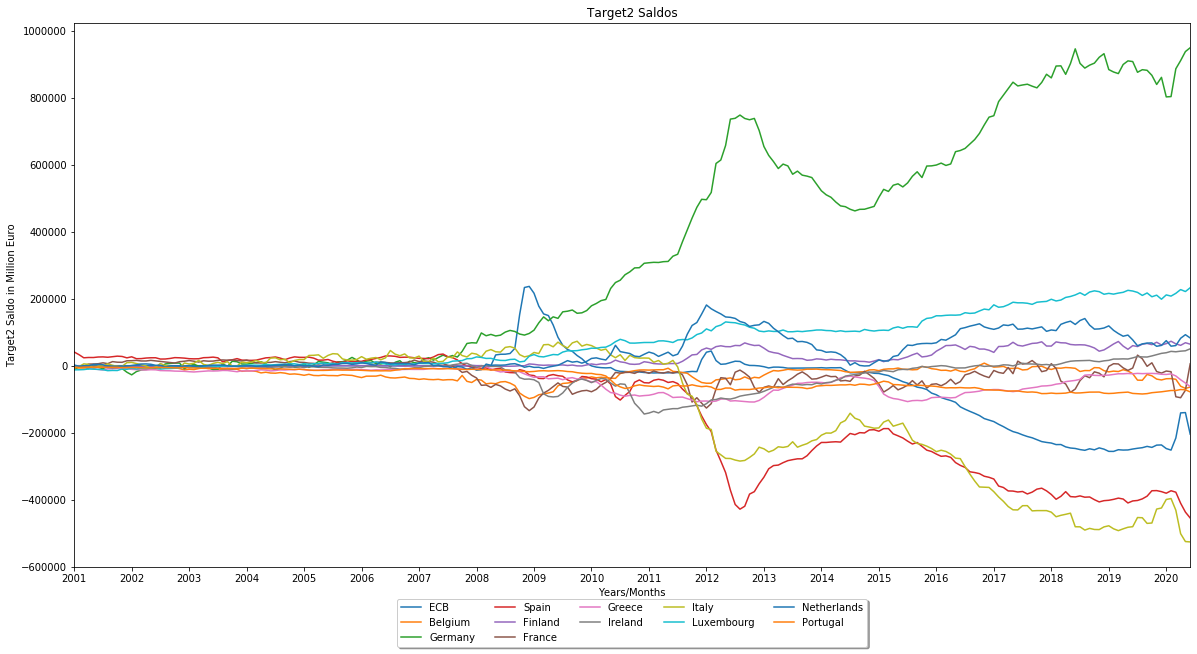

In [11]:
# hide
years = np.arange(2001, 2021, 1);
plt.figure();
ax = df_average.plot(kind='line', figsize=(20,10), title='Target2 Saldos');
plt.xlabel('Years/Months');
plt.ylabel('Target2 Saldo in Million Euro');
plt.xticks(np.arange(0, df_average.shape[0], step=12), years);
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5);

# Average of Target2 per month

### Compare Saldos of all banks

In [12]:
# hide
source = df_average
source = source.reset_index().melt('Year / Months', var_name='Central Banks', value_name='Target2 Saldo')

In [13]:
# hide-input
# Create a selection that chooses the nearest point & selects based on x-value
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['Year / Months'], empty='none')

# The basic line
line = alt.Chart(source).mark_line(interpolate='basis').encode(
    x='Year / Months:T',
    y='Target2 Saldo:Q',
    color='Central Banks:N'
)

In [14]:
# hide-input
# Transparent selectors across the chart. This is what tells us
# the x-value of the cursor
selectors = alt.Chart(source).mark_point().encode(
    x='Year / Months:T',
    opacity=alt.value(0),
).add_selection(
    nearest
)

# Draw points on the line, and highlight based on selection
points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw text labels near the points, and highlight based on selection
text = line.mark_text(align='left', dx=5, dy=-5).encode(
    text=alt.condition(nearest, 
                       'Target2 Saldo:Q',
                       alt.value(' '))
)

# Draw a rule at the location of the selection
rules = alt.Chart(source).mark_rule(color='gray').encode(
    x='Year / Months:T',
).transform_filter(
    nearest
)

# Put the five layers into a chart and bind the data
alt.layer(
    line, selectors, points, rules, text
).properties(
    width=600, height=500
)

alt.LayerChart(...)

### Check single banks

In [15]:
# hide
source = df_average
source = source.reset_index().melt('Year / Months', var_name='Central Banks', value_name='Target2 Saldo')

In [16]:
# hide
selection = alt.selection_multi(fields=['Central Banks'], bind='legend')

In [17]:
# hide
line = alt.Chart(source).mark_line(interpolate='basis').encode(
    x='Year / Months:T',
    y='Target2 Saldo:Q',
    color='Central Banks:N',
    opacity=alt.condition(selection, alt.value(1), alt.value(0.2)),
    tooltip = [alt.Tooltip('Target2 Saldo'),
              ]
).add_selection(
    selection
).interactive().properties(
    width=600, height=500
)
line

alt.Chart(...)